In [1]:
import calour as ca
%matplotlib notebook

/Users/amnon/miniconda3/envs/calour/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
ca.set_log_level(11)

# Load the ants dataset
Data from:

"Dramatic Differences in Gut Bacterial Densities Correlate with Diet and Habitat in Rainforest Ants"

Jon G. Sanders,1,*,† Piotr Łukasik,‡ Megan E. Frederickson,§ Jacob A. Russell,‡ Ryuichi Koga,¶
Rob Knight† and Naomi E. Pierce*

In [3]:
dat=ca.read_amplicon('./all.withtax.biom','./map.txt',normalize=10000,min_reads=1000)

2018-07-12 16:17:10 INFO loaded 389 samples, 41409 features
2018-07-12 16:17:10 WARNING These have metadata but do not have data - dropped: {'10343.JS1026', '10343.JS1138', '10343.JS2068.c', '10343.JS1708', '10343.JS1624.f', '10343.JS1797', '10343.2160a', '10343.JS1225.b', '10343.JS1508', '10343.JS1165.d', '10343.JS1901', '10343.JS2113', '10343.JS2009.e', '10343.JS1170', '10343.JS2159.c', '10343.JS1681', '10343.BLANK.JS6.12H', '10343.JS1946', '10343.JS1713.f', '10343.JS1684', '10343.JS1991', '10343.JS1497', '10343.JS1041', '10343.JS1180.d', '10343.JS1762', '10343.JS1354.f', '10343.JS1180.f', '10343.JS1213', '10343.JS1603', '10343.JS1015', '10343.JS1529', '10343.JS1354.d', '10343.JS1470', '10343.JS1043', '10343.JS1297.h', '10343.JS1451', '10343.JS1709', '10343.JS1344', '10343.JS0917', '10343.JS2068.b', '10343.JS2089.d', '10343.JS1625', '10343.JS1300', '10343.JS1139', '10343.JS2195.a', '10343.JS1648', '10343.JS0981', '10343.JS1969', '10343.JS1543', '10343.JS1507', '10343.JS0835', '10343.

## Filter and sort samples and features
Keeping only the five main ant genus samples (ones that have at least 14 adult samples per genus), and only interesting features (> 100 reads over all samples)

In [5]:
datc = dat.filter_samples('genus',['Camponotus','Dolichoderus','Cephalotes','Neoponera','Azteca'])
datc = datc.filter_abundance(100)
datc=datc.sort_samples('life_stage').sort_samples('primer_plate').sort_samples('colony').sort_samples('genus')

2018-07-12 16:18:16 INFO After filtering, 455 remaining


## cluster the features
simililarly behaving bacteria will be close to each other

In [6]:
datc = datc.cluster_features()

2018-07-12 16:18:53 INFO After filtering, 455 remaining


## Plot the whole experiment heatmap (fig 4A)

<IPython.core.display.Javascript object>


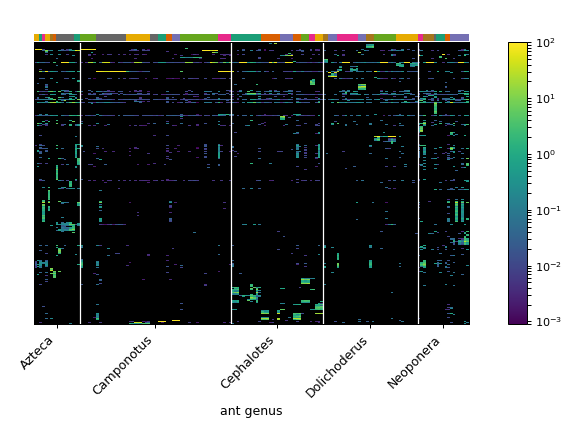

Text(0.5,-36.6356,'ant genus')

In [7]:
f=datc.normalize(100).plot(sample_field='genus',gui='jupyter',
                           barx_fields=['colony'],barx_label=False,
                           feature_field=None,clim=[0,100])
f.ax_hm.axes.set_xlabel('ant genus')

In [8]:
f.save_figure('figure-4A-ants-all.pdf')

# Plate dependent contaminant

For the plate contaminant, look at all samples (since we sort by plate)

In [9]:
alldatc = dat.filter_abundance(10)
alldatc=alldatc.sort_samples('life_stage').sort_samples('primer_plate').sort_samples('colony').sort_samples('genus')
alldatc=alldatc.cluster_features()

2018-07-12 16:19:22 INFO After filtering, 8292 remaining
2018-07-12 16:19:22 INFO After filtering, 8292 remaining


Interactively explore to find the candidate contamination bacteria
and print their axes ranges for the zoom plot

<IPython.core.display.Javascript object>


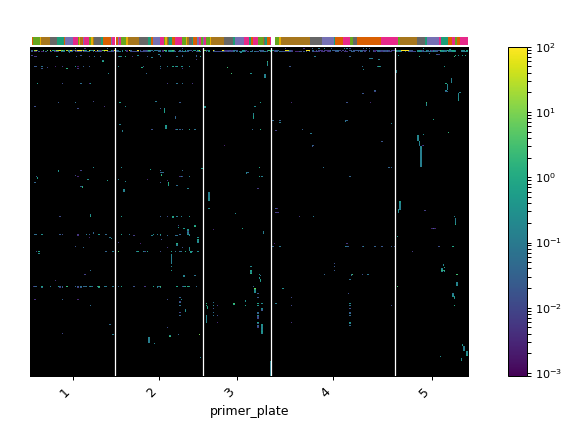

In [10]:
f=alldatc.normalize(100).sort_samples('primer_plate').plot(sample_field='primer_plate',gui='jupyter',
                                                           barx_fields=['genus'],barx_label=False,
                                                           feature_field=None,clim=[0,100])

## Save the plate dependent contaminant (Fig 4B)

After zooming in and exploring in the the previous plot, we plot only the specified the region showing the contaminant:

<IPython.core.display.Javascript object>


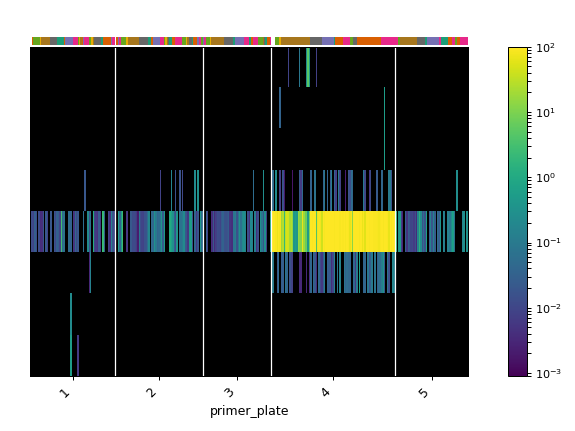

In [11]:
f=alldatc.normalize(100).sort_samples('primer_plate').plot(sample_field='primer_plate',gui='jupyter',
                                                           barx_fields=['genus'],barx_label=False,
                                                           feature_field=None,clim=[0,100],
                                                           rect=[-0.5, 314.5, 19.5, 11.5])

In [12]:
f.save_figure('figure-4B-ants-plate-contaminant.pdf')

In [13]:
# Add common dbbact term (out of contaminant / other / none)

In [14]:
datc=datc.add_terms_to_features('dbbact',['contaminant'])

2018-07-12 16:20:09 INFO Getting dbBact annotations for 455 sequences, please wait...
2018-07-12 16:20:20 INFO Got 10416 annotations
2018-07-12 16:20:20 INFO Added annotation data to experiment. Total 2220 annotations, 455 terms


## look for general reagent contaminants

keep only the 5 main genuses for the plot to make it nicer

In [16]:
general_contam = alldatc.filter_samples('genus',['Camponotus','Dolichoderus','Cephalotes','Neoponera','Azteca'])
general_contam.add_terms_to_features('dbbact',['contaminant'])

2018-07-12 16:20:47 INFO Getting dbBact annotations for 8292 sequences, please wait...
2018-07-12 16:21:02 INFO Got 36013 annotations
2018-07-12 16:21:02 INFO Added annotation data to experiment. Total 2260 annotations, 8292 terms


AmpliconExperiment ("all.withtax.biom") with 161 samples, 8292 features

Interactively explore to find the contaminant block and save the cooredinates

<IPython.core.display.Javascript object>


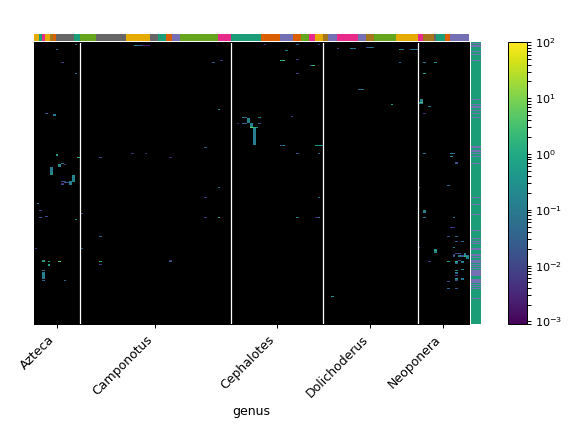

In [17]:
f=general_contam.normalize(100).plot(sample_field='genus',gui='jupyter',
                                     barx_fields=['colony'], barx_label=False,
                                     bary_fields=['common_term'], bary_label=False,
                                     feature_field=None,clim=[0,100])

## Save general contaminant figure (Fig 4C)
feature colorbar : orange - contaminant, blue - other, green - unknown

<IPython.core.display.Javascript object>


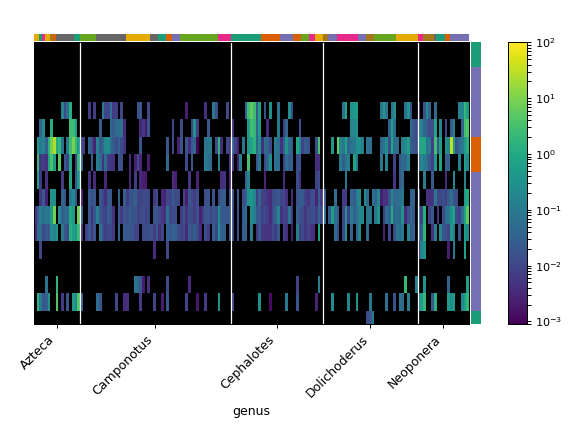

In [18]:
f=general_contam.normalize(100).plot(sample_field='genus',gui='jupyter',
                                     barx_fields=['colony'], barx_label=False,
                                     bary_fields=['common_term'], bary_label=False,
                                     feature_field=None,clim=[0,100],
                                     rect=[-0.5, 160.5, 145.2578125, 129.0625])

In [19]:
f.save_figure('figure-4C-ants-general-contaminant.eps', format='eps')

## saved the 3 plate dependent contaminants to "contamination.fa" using the gui

## saved the 8 general contaminants to contamination2.fa

# Filter for contaminants and keep only main genuses/life stage

## Only remove the per plate contaminants
save to ants-filtered-1.biom

In [58]:
datn=ca.read_amplicon('./all.withtax.biom', './map.txt', normalize=None, min_reads=None)

2018-07-12 16:49:11 INFO loaded 389 samples, 41409 features
2018-07-12 16:49:11 WARNING These have metadata but do not have data - dropped: {'10343.JS1026', '10343.JS1138', '10343.JS2068.c', '10343.JS1708', '10343.JS1624.f', '10343.JS1797', '10343.2160a', '10343.JS1225.b', '10343.JS1508', '10343.JS1165.d', '10343.JS1901', '10343.JS2113', '10343.JS2009.e', '10343.JS1170', '10343.JS2159.c', '10343.JS1681', '10343.BLANK.JS6.12H', '10343.JS1946', '10343.JS1713.f', '10343.JS1684', '10343.JS1991', '10343.JS1497', '10343.JS1041', '10343.JS1180.d', '10343.JS1762', '10343.JS1354.f', '10343.JS1180.f', '10343.JS1213', '10343.JS1603', '10343.JS1015', '10343.JS1529', '10343.JS1354.d', '10343.JS1470', '10343.JS1043', '10343.JS1297.h', '10343.JS1451', '10343.JS1709', '10343.JS1344', '10343.JS0917', '10343.JS2068.b', '10343.JS2089.d', '10343.JS1625', '10343.JS1300', '10343.JS1139', '10343.JS2195.a', '10343.JS1648', '10343.JS0981', '10343.JS1969', '10343.JS1543', '10343.JS1507', '10343.JS0835', '10343.

In [59]:
datn=dat.filter_fasta('contamination.fa',negate=True)

In [60]:
datn=datn.filter_by_data('abundance', cutoff=1000, mean_or_sum='sum', axis='s')

2018-07-12 16:49:12 INFO After filtering, 273 remaining


In [61]:
datn.save_biom('ants-filtered-1-withtax.biom')

## Remove both sets of contaminants
save to ants-filtered-2.biom

In [62]:
datn2=ca.read_amplicon('./all.withtax.biom','./map.txt',normalize=None,min_reads=None)

2018-07-12 16:51:13 INFO loaded 389 samples, 41409 features
2018-07-12 16:51:14 WARNING These have metadata but do not have data - dropped: {'10343.JS1026', '10343.JS1138', '10343.JS2068.c', '10343.JS1708', '10343.JS1624.f', '10343.JS1797', '10343.2160a', '10343.JS1225.b', '10343.JS1508', '10343.JS1165.d', '10343.JS1901', '10343.JS2113', '10343.JS2009.e', '10343.JS1170', '10343.JS2159.c', '10343.JS1681', '10343.BLANK.JS6.12H', '10343.JS1946', '10343.JS1713.f', '10343.JS1684', '10343.JS1991', '10343.JS1497', '10343.JS1041', '10343.JS1180.d', '10343.JS1762', '10343.JS1354.f', '10343.JS1180.f', '10343.JS1213', '10343.JS1603', '10343.JS1015', '10343.JS1529', '10343.JS1354.d', '10343.JS1470', '10343.JS1043', '10343.JS1297.h', '10343.JS1451', '10343.JS1709', '10343.JS1344', '10343.JS0917', '10343.JS2068.b', '10343.JS2089.d', '10343.JS1625', '10343.JS1300', '10343.JS1139', '10343.JS2195.a', '10343.JS1648', '10343.JS0981', '10343.JS1969', '10343.JS1543', '10343.JS1507', '10343.JS0835', '10343.

In [63]:
datn2=datn2.filter_fasta('contamination.fa',negate=True)

In [64]:
datn2=datn2.filter_fasta('contamination2.fa',negate=True)

In [65]:
datn2=datn2.filter_by_data('abundance',cutoff=1000, mean_or_sum='sum', axis='s')

2018-07-12 16:51:18 INFO After filtering, 277 remaining


In [66]:
datn2.save_biom('ants-filtered-2-withtax.biom')

# clean the dataset
## keeping only samples from common genus and adult life stage
For figure 4D

In [87]:
datnf = ca.read_amplicon('all.withtax.biom','map.txt',normalize=None, min_reads=None)
datf1 = ca.read_amplicon('ants-filtered-1-withtax.biom','map.txt',normalize=None, min_reads=None)
datf2 = ca.read_amplicon('ants-filtered-2-withtax.biom','map.txt',normalize=None, min_reads=None)

2018-07-12 17:10:05 INFO loaded 389 samples, 41409 features
2018-07-12 17:10:05 WARNING These have metadata but do not have data - dropped: {'10343.JS1026', '10343.JS1138', '10343.JS2068.c', '10343.JS1708', '10343.JS1624.f', '10343.JS1797', '10343.2160a', '10343.JS1225.b', '10343.JS1508', '10343.JS1165.d', '10343.JS1901', '10343.JS2113', '10343.JS2009.e', '10343.JS1170', '10343.JS2159.c', '10343.JS1681', '10343.BLANK.JS6.12H', '10343.JS1946', '10343.JS1713.f', '10343.JS1684', '10343.JS1991', '10343.JS1497', '10343.JS1041', '10343.JS1180.d', '10343.JS1762', '10343.JS1354.f', '10343.JS1180.f', '10343.JS1213', '10343.JS1603', '10343.JS1015', '10343.JS1529', '10343.JS1354.d', '10343.JS1470', '10343.JS1043', '10343.JS1297.h', '10343.JS1451', '10343.JS1709', '10343.JS1344', '10343.JS0917', '10343.JS2068.b', '10343.JS2089.d', '10343.JS1625', '10343.JS1300', '10343.JS1139', '10343.JS2195.a', '10343.JS1648', '10343.JS0981', '10343.JS1969', '10343.JS1543', '10343.JS1507', '10343.JS0835', '10343.

In [88]:
datf2.sample_metadata['life_stage'].value_counts()

adult                 217
late instar larva      25
mid instar larva       24
early instar larva     10
pupa instar larva       1
Name: life_stage, dtype: int64

In [89]:
datnf=datnf.filter_samples('life_stage','adult')
datf1=datf1.filter_samples('life_stage','adult')
datf2=datf2.filter_samples('life_stage','adult')

In [90]:
datf2.sample_metadata['genus'].value_counts()

Camponotus        38
Dolichoderus      27
Cephalotes        25
Azteca            14
Neoponera         14
Pseudomyrmex      11
Odontomachus      10
Solenopsis        10
Eciton             9
Crematogaster      8
Pheidole           7
Myrmelachista      6
Megalomyrmex       6
Paraponera         3
Procryptocerus     3
Basiceros          3
Pachycondyla       2
Atta               2
Ectatomma          2
Daceton            2
Gnamptogenys       2
Acanthostichus     2
Gigantiops         2
Allomerus          2
Pseudoponera       2
Neivamyrmex        1
Trachymyrmex       1
Labidus            1
Name: genus, dtype: int64

In [91]:
datnf=datnf.filter_samples('genus',['Camponotus','Dolichoderus','Cephalotes','Neoponera','Azteca'])
datf1=datf1.filter_samples('genus',['Camponotus','Dolichoderus','Cephalotes','Neoponera','Azteca'])
datf2=datf2.filter_samples('genus',['Camponotus','Dolichoderus','Cephalotes','Neoponera','Azteca'])

In [92]:
datf2

AmpliconExperiment ("ants-filtered-2-withtax.biom") with 118 samples, 41398 features

In [93]:
datnf.save_biom('ants-notfiltered-subset.biom')
datf1.save_biom('ants-filtered-1-subset.biom')
datf2.save_biom('ants-filtered-2-subset.biom')

In [94]:
datx = ca.read_amplicon('ants-filtered-2-subset.biom','map.txt',normalize=10000,min_reads=1000)
datnx = ca.read_amplicon('ants-notfiltered-subset.biom','map.txt',normalize=10000,min_reads=1000)

2018-07-12 17:11:26 INFO loaded 118 samples, 41398 features
2018-07-12 17:11:27 WARNING These have metadata but do not have data - dropped: {'10343.JS1770', '10343.JS1884.a', '10343.JS2068.c', '10343.JS1759.b', '10343.JS2079.d1', '10343.JS1897', '10343.JS1472', '10343.JS2197', '10343.JS1999.c', '10343.JS0632.c', '10343.JS2038', '10343.JS1225.b', '10343.JS1508', '10343.JS1462', '10343.JS1165.d', '10343.JS0867', '10343.JS1662', '10343.JS0960.a', '10343.JS1901', '10343.JS1612', '10343.JS1999.b', '10343.JS1773', '10343.JS1772', '10343.JS1123', '10343.JS1354.a', '10343.JS2039', '10343.JS1286', '10343.JS1137', '10343.BLANK.JS6.12H', '10343.JS1713.f', '10343.JS2000', '10343.JS1309', '10343.JS1611.b', '10343.JS1747', '10343.JS2060', '10343.JS0604.b', '10343.JS1053', '10343.JS1611.c', '10343.JS1453', '10343.JS2079.e2', '10343.JS1542', '10343.JS1738', '10343.JS1165.c', '10343.JS0983', '10343.JS2019.c', '10343.JS1367', '10343.JS1200.a', '10343.JS1724', '10343.JS2169.a', '10343.JS2195.c', '10343.J

2018-07-12 17:11:28 INFO After filtering, 118 remaining


In [95]:
datx=datx.cluster_features(10)
datnx=datnx.cluster_features(10)

2018-07-12 17:12:04 INFO After filtering, 3256 remaining
2018-07-12 17:12:04 INFO After filtering, 3171 remaining


In [96]:
datx=datx.sort_samples('colony')
datnx=datnx.sort_samples('colony')

## Camponotus (fig 4D)

In [ ]:
tt

2018-07-12 17:20:50 INFO After filtering, 46 remaining
2018-07-12 17:20:50 INFO After filtering, 32 remaining


<IPython.core.display.Javascript object>


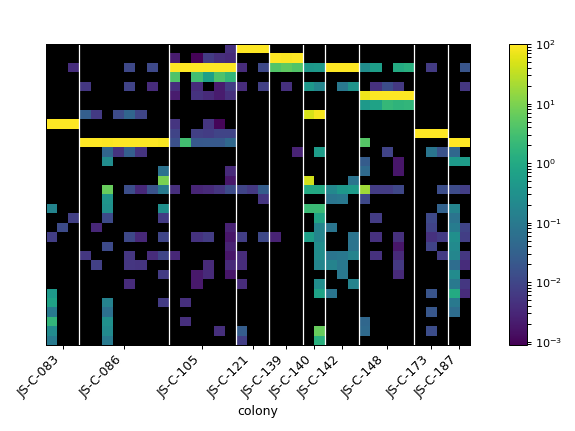

In [133]:
tt=datx.filter_samples('genus','Camponotus')

tt=tt.filter_prevalence(0.1, cutoff=0.1)

tt=tt.cluster_features(10)

f=tt.normalize(100).sort_samples('colony').plot(sample_field='colony',gui='jupyter',
                                                clim=[0,100], feature_field=None)

In [134]:
f.save_figure('figure-4D-ants-colony-camponotus.pdf')

## Dolichonderus (fig 4E)

2018-07-12 17:21:52 INFO After filtering, 129 remaining
2018-07-12 17:21:52 INFO After filtering, 121 remaining


<IPython.core.display.Javascript object>


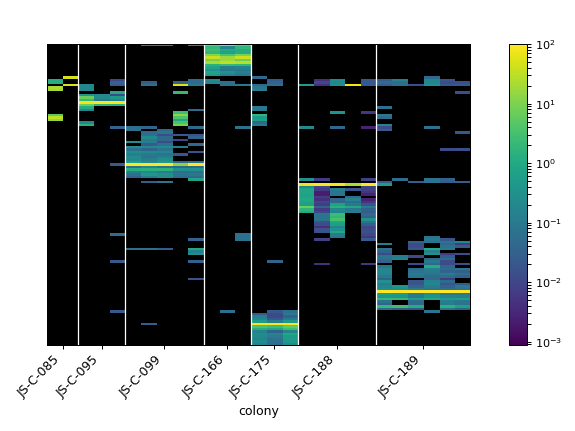

In [135]:
tt=datx.filter_samples('genus','Dolichoderus')

tt=tt.filter_prevalence(0.1, cutoff=0.1)

tt=tt.cluster_features(10)

f=tt.normalize(100).sort_samples('colony').plot(sample_field='colony',gui='jupyter',
                                                clim=[0,100], feature_field=None)

In [136]:
f.save_figure('figure-4E-ants-colony-dolychonderus.pdf')

## Cephalotes

2018-07-12 17:22:06 INFO After filtering, 94 remaining
2018-07-12 17:22:06 INFO After filtering, 91 remaining


<IPython.core.display.Javascript object>


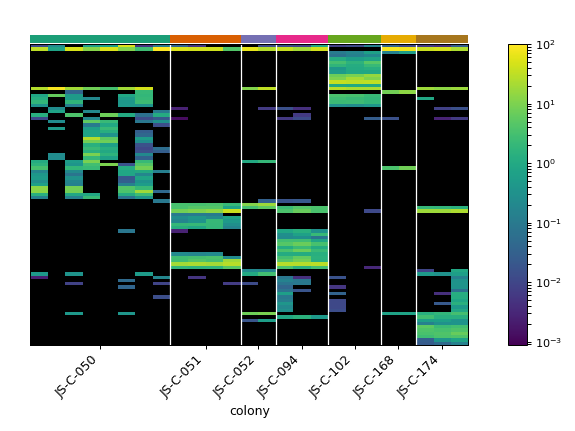

In [137]:
tt=datx.filter_samples('genus','Cephalotes')

tt=tt.filter_prevalence(0.1)

tt=tt.cluster_features(10)

f=tt.normalize(100).sort_samples('colony').plot(sample_field='colony',gui='jupyter',
                                                barx_fields=['colony'],barx_label=False,clim=[0,100])

## Neoponera

2018-07-12 17:22:07 INFO After filtering, 337 remaining
2018-07-12 17:22:07 INFO After filtering, 322 remaining


<IPython.core.display.Javascript object>


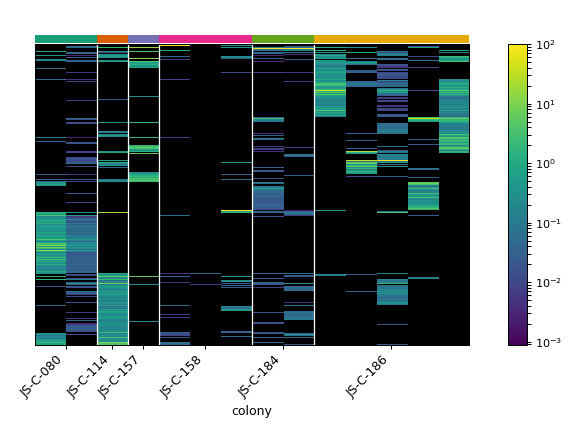

In [138]:
tt=datx.filter_samples('genus','Neoponera')

tt=tt.filter_prevalence(0.1)

tt=tt.cluster_features(10)

f=tt.normalize(100).sort_samples('colony').plot(sample_field='colony',gui='jupyter',
                                                barx_fields=['colony'],barx_label=False,clim=[0,100])